# **2차 미니프로젝트**

## **1. 데이터 분석 및 전처리**

### **가설 1. 일조량과 일사량이 미세먼지 농도에 관련이 있을 것이다.**

### **가설 2. 강수량과 풍속이 미세먼지 농도에 관련이 있을 것이다.**

In [123]:
# 가설 1 검증
path = 'C:/Users/User/project/'

In [124]:
# 필요한 라이브러리 설치 및 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall

from sklearn.preprocessing import MinMaxScaler
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [125]:
# 시각화 한글폰트 설정을 위해 아래 코드를 실행하세요.
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [126]:
df_22 = pd.read_csv('df_22.csv')
df_23 = pd.read_csv('df_23.csv')

df_22.set_index('Time', inplace = True)
df_23.set_index('Time', inplace = True)

In [127]:
df_22.columns

Index(['Unnamed: 0', '지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3',
       'NO2', 'PM10', 'PM25', '주소', '지점명', '일시', '기온(°C)', '기온 QC플래그',
       '강수량(mm)', '강수량 QC플래그', '풍속(m/s)', '풍속 QC플래그', '풍향(16방위)', '풍향 QC플래그',
       '습도(%)', '습도 QC플래그', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '현지기압 QC플래그',
       '해면기압(hPa)', '해면기압 QC플래그', '일조(hr)', '일조 QC플래그', '일사(MJ/m2)',
       '일사 QC플래그', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)',
       '운형(운형약어)', '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)',
       '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

In [128]:
df_22['PM10_1'] = df_22['PM10'].shift(-1)
df_23['PM10_1'] = df_23['PM10'].shift(-1)

In [129]:
df_22 = df_22[['일조(hr)', '일사(MJ/m2)', 'PM10_1', '강수량(mm)', '풍속(m/s)', 'PM10']]
df_23 = df_23[['일조(hr)', '일사(MJ/m2)', 'PM10_1', '강수량(mm)', '풍속(m/s)', 'PM10']]

In [130]:
mean_cols=['일조(hr)','일사(MJ/m2)']

In [131]:
for col in mean_cols:
    df_22[col].fillna(df_22[col].mean(),inplace=True)
    df_23[col].fillna(df_23[col].mean(),inplace=True)

In [132]:
z_cols=['강수량(mm)','풍속(m/s)']

In [133]:
for col in z_cols:
    df_22[col].fillna(0,inplace=True)
    df_23[col].fillna(0,inplace=True)

<Axes: >

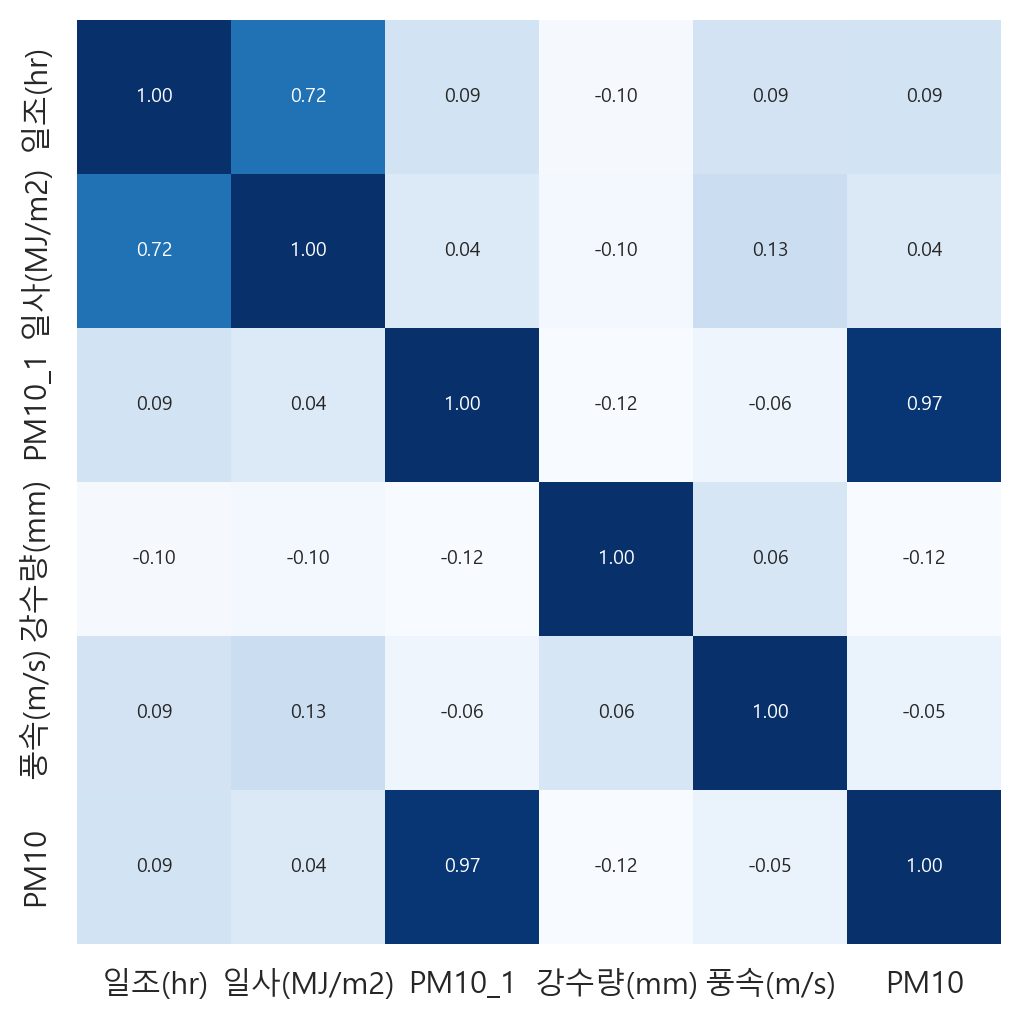

In [134]:
fig, axe = plt.subplots(figsize = (6,6))
sns.heatmap(df_22.corr(numeric_only=True),
           annot = True, 
           fmt='.2f',
           cmap = 'Blues',
           square = True,
           cbar = False,
           annot_kws= {'size' : 7},
           ax = axe)

## **2. 머신러닝 모델링**

In [135]:
df_22 = pd.read_csv('df_22.csv')
df_23 = pd.read_csv('df_23.csv')

df_22.set_index('Time', inplace = True)
df_23.set_index('Time', inplace = True)

In [138]:
df_22 = df_22[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '일조(hr)','일사(MJ/m2)']]
df_23 = df_23[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '일조(hr)','일사(MJ/m2)']]

In [139]:
mean_cols=['일조(hr)','일사(MJ/m2)']

In [140]:
for col in mean_cols:
    df_22[col].fillna(df_22[col].mean(),inplace=True)
    df_23[col].fillna(df_23[col].mean(),inplace=True)

In [141]:
df_22.isnull().sum()

SO2            87
CO             87
O3             87
NO2            87
PM10          156
PM25          105
기온(°C)          0
강수량(mm)      7821
풍속(m/s)         0
풍향(16방위)        0
습도(%)           0
일조(hr)          0
일사(MJ/m2)       0
dtype: int64

In [142]:
list1 = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']
for i in list1:
    df_22[i].fillna(method='ffill', inplace = True)

In [143]:
list1 = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']
for i in list1:
    df_23[i].fillna(method='ffill', inplace = True)

In [144]:
df_22['PM10_1'] = df_22['PM10'].shift(-1)
df_23['PM10_1'] = df_23['PM10'].shift(-1)

In [145]:
df_22.isnull().sum()

SO2             0
CO              0
O3              0
NO2             0
PM10            0
PM25            0
기온(°C)          0
강수량(mm)      7821
풍속(m/s)         0
풍향(16방위)        0
습도(%)           0
일조(hr)          0
일사(MJ/m2)       0
PM10_1          1
dtype: int64

In [146]:
df_22.tail()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),일조(hr),일사(MJ/m2),PM10_1
Time,,,,,,,,,,,,,,
2022-12-31 19:00:00,0.004,1.5,0.002,0.070,71.0,59.0,-0.2,NaN,1.8,20,73,0.485327,1.11187,76.0
2022-12-31 20:00:00,0.005,1.6,0.002,0.070,76.0,62.0,-0.8,NaN,1.4,20,75,0.485327,1.11187,76.0
2022-12-31 21:00:00,0.004,1.7,0.002,0.072,76.0,66.0,-1.0,NaN,0.9,340,77,0.485327,1.11187,77.0
2022-12-31 22:00:00,0.005,1.8,0.002,0.072,77.0,67.0,-0.8,NaN,0.5,290,78,0.485327,1.11187,76.0
2022-12-31 23:00:00,0.004,1.6,0.002,0.070,76.0,67.0,-0.2,NaN,1.3,230,77,0.485327,1.11187,NaN


In [147]:
df_22['강수량(mm)'].fillna(0, inplace = True)
df_23['강수량(mm)'].fillna(0, inplace = True)

In [148]:
df_22['PM10_1'].fillna(method = 'ffill', inplace = True)
df_23['PM10_1'].fillna(method = 'ffill', inplace = True)

In [149]:
df_23.isnull().sum()

SO2          0
CO           0
O3           0
NO2          0
PM10         0
PM25         0
기온(°C)       0
강수량(mm)      0
풍속(m/s)      0
풍향(16방위)     0
습도(%)        0
일조(hr)       0
일사(MJ/m2)    0
PM10_1       0
dtype: int64

In [150]:
target = 'PM10_1'
train_x = df_22.drop(target, axis = 1)
train_y = df_22.loc[:, target]
test_x = df_23.drop(target, axis = 1)
test_y = df_23.loc[:, target]

In [151]:
model_name = ['KNeighborsRegressor', 'LinearRegression', 'Lasso', 'Ridge', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor']
models = [KNeighborsRegressor(n_neighbors=5), LinearRegression(), Lasso(), Ridge(), DTR(max_depth=5), RFR(), GBR()]

In [152]:
def create_model(models, model_name, x_train, x_test, y_train, y_test):
    for model, model_name in zip(models, model_name):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print('=' * 10, model_name, '=' * 30)
        print('MSE : ', mse(y_test, y_pred).round(5))
        print('MAE : ', mean_absolute_error(y_test, y_pred).round(5))
        print('R2 : ', r2_score(y_test, y_pred).round(5))
        joblib.dump(model, model_name + '.pkl')

In [153]:
create_model(models, model_name, train_x, test_x, train_y, test_y)

========== KNeighborsRegressor ==============================
MSE :  90.71705
MAE :  5.68951
R2 :  0.91903
========== LinearRegression ==============================
MSE :  46.11379
MAE :  3.98029
R2 :  0.95884
========== Lasso ==============================
MSE :  46.71809
MAE :  4.01588
R2 :  0.9583
========== Ridge ==============================
MSE :  46.11323
MAE :  3.97777
R2 :  0.95884
========== DecisionTreeRegressor ==============================
MSE :  56.70867
MAE :  4.34029
R2 :  0.94938
========== RandomForestRegressor ==============================
MSE :  54.54827
MAE :  4.28836
R2 :  0.95131
========== GradientBoostingRegressor ==============================
MSE :  54.36921
MAE :  4.15845
R2 :  0.95147


In [154]:
model1 = joblib.load('GradientBoostingRegressor.pkl')
model2 = joblib.load('RandomForestRegressor.pkl')

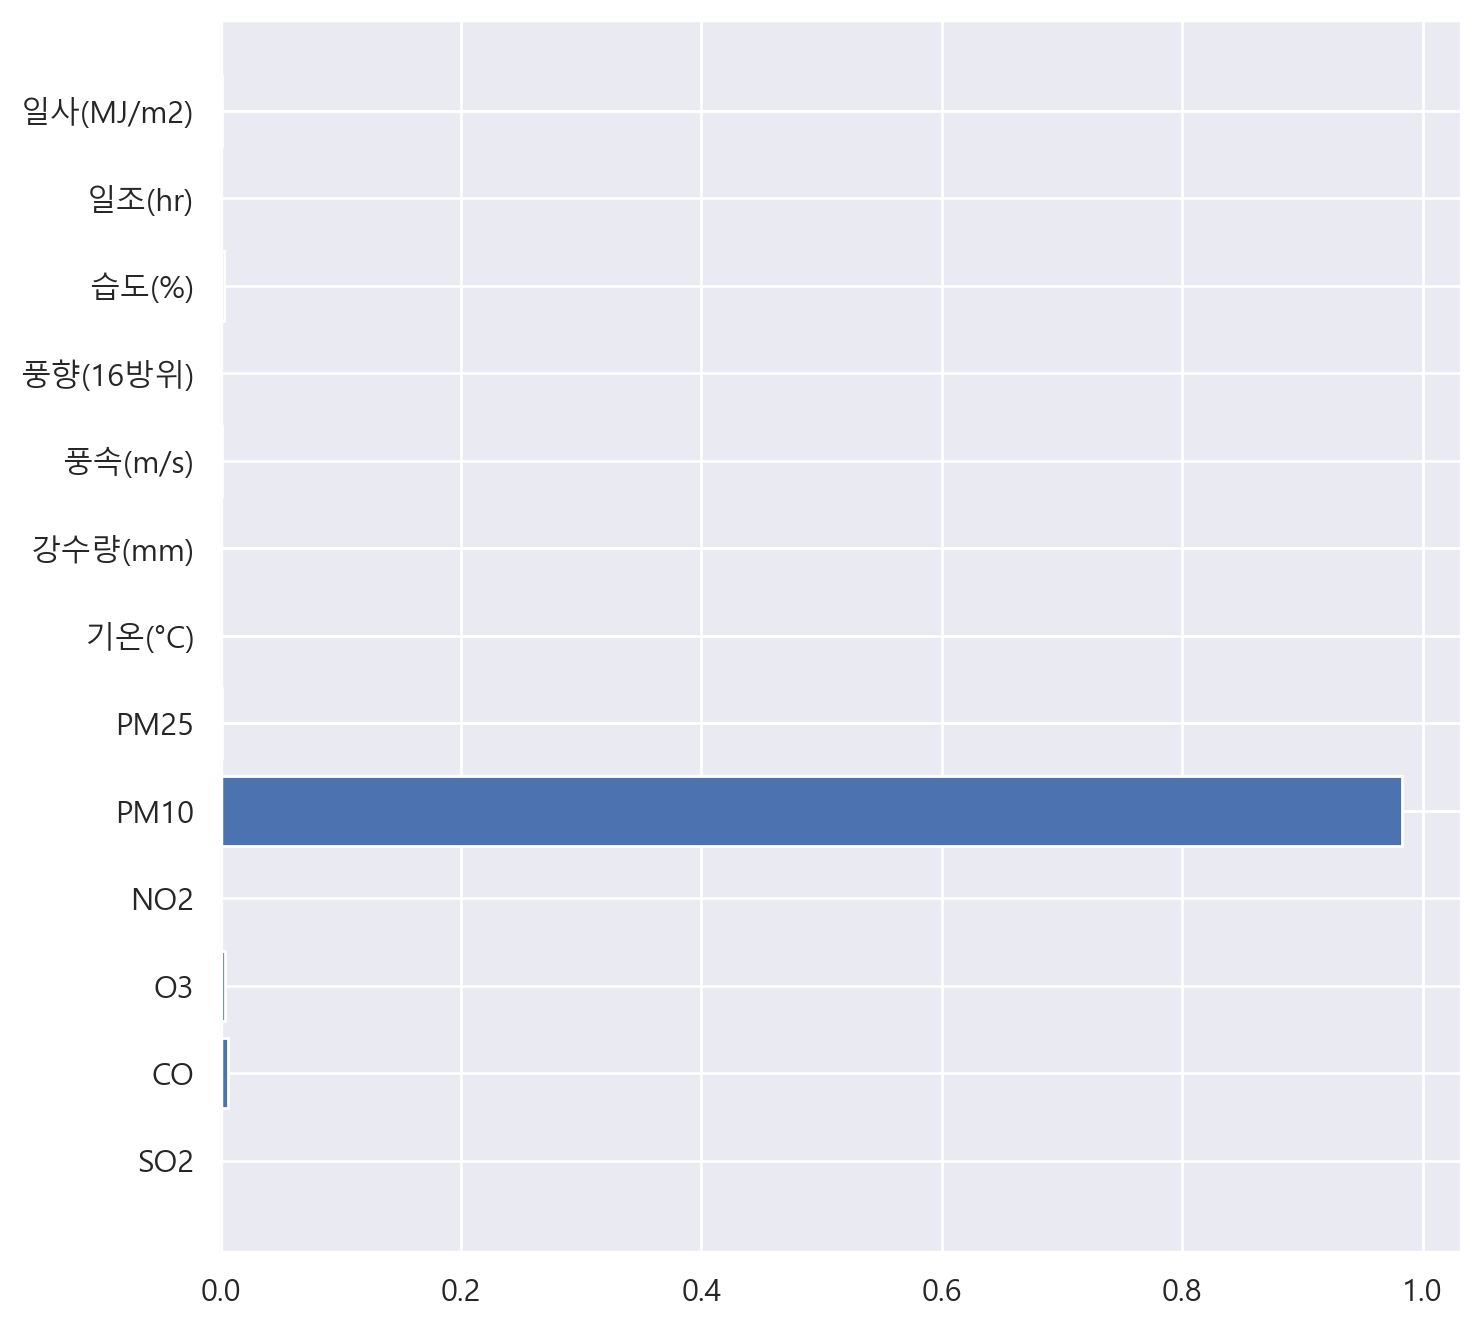

In [155]:
plt.figure(figsize=(8,8))
plt.barh(y=list(train_x),width=model1.feature_importances_)
plt.show()

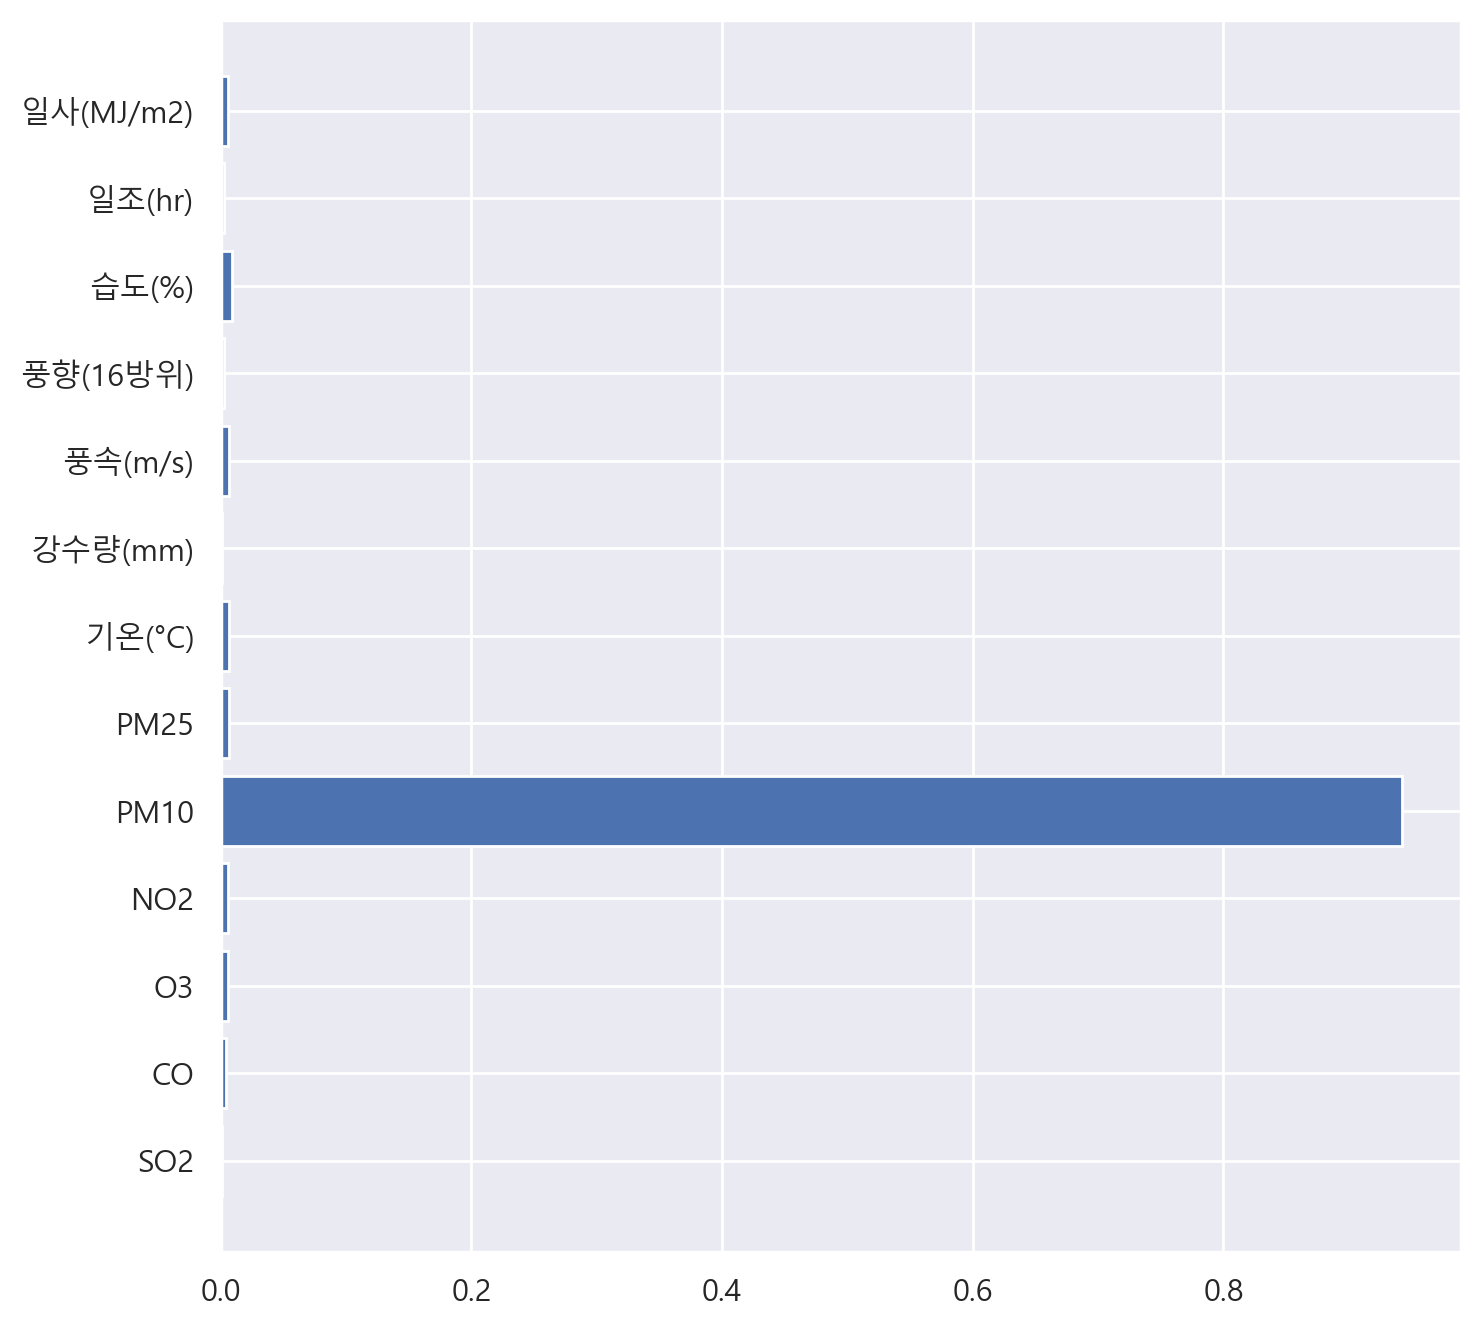

In [156]:
plt.figure(figsize=(8,8))
plt.barh(y=list(train_x),width=model2.feature_importances_)
plt.show()

## **3. 종합 결과**

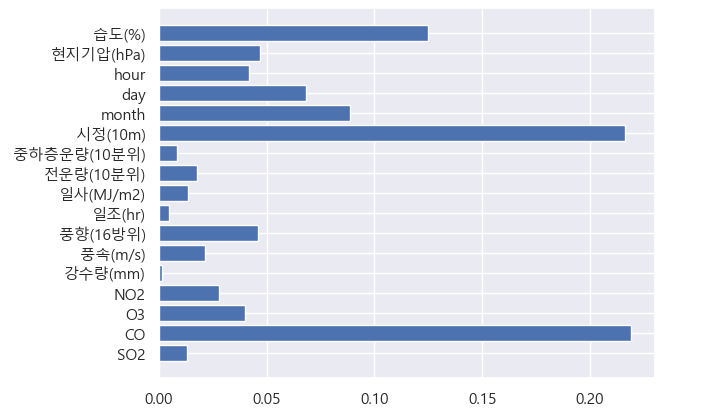

#### **결과**
- **PM10이 너무 높아 빼고, 나머지 변수를 본 결과 입니다.**

**1. 일조량, 일사량, 강수량, 풍속보다는 오히려 CO, 시정, 습도(%) 같은 변수들이 PM10(미세먼지) 예측에 있어서 중요도가 더 높았습니다.**